In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
def read_file(path):
    # Read the file into a DataFrame
    df = pd.read_csv(path)
    
    # Combine 'dteday' and 'hr' columns to create a datetime column
    df['datetime'] = pd.to_datetime(df['dteday'] + ' ' + df['hr'].astype(str), format='%Y-%m-%d %H')
    
    # Set the new column 'datetime' as the index
    df.set_index('datetime', inplace=True)
    
    # Return the resulting DataFrame
    return df


def model_analysis(path):

    #load the file
    bike_data = read_file(path)
    #bike_data.set_index('hr', inplace=True)

    # with p..dummies convert the categorical variables in 0,1 indicator
    categorical_features = ['season', 'weathersit', 'hr', 'weekday']
    bike_data_encoded = pd.get_dummies(bike_data, columns=categorical_features, drop_first=True)

    # Drop unnecessary columns
    features_to_drop = ['instant', 'dteday', 'casual', 'registered']
    bike_data_prepared = bike_data_encoded.drop(features_to_drop, axis=1)

    # Splitting the dataset into features and target variable
    #i addition to the dropped before we will drop the target variable
    X = bike_data_prepared.drop('cnt', axis=1) 
    y = bike_data_prepared['cnt']

    # Split the data into training and testing sets randomly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)

    return  rmse, mae, y_test, y_pred

In [3]:
result_dir = 'result'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
path = "bike+sharing+dataset/hour.csv"

In [4]:

#loading the model
rmse, mae, y_test, y_pred = model_analysis(path)


In [5]:
print("mean absolute error:",mae)

mean absolute error: 32.36957825086306


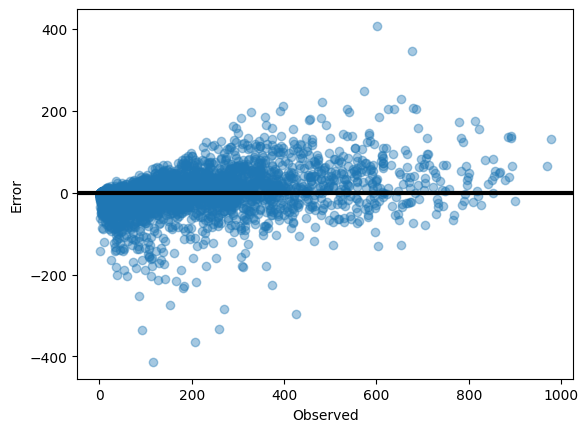

In [6]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error, alpha=0.4)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.savefig(os.path.join(result_dir, 'error.pdf'))


In [7]:
##### Plotting the variable sof interest
hourly = read_file(path)


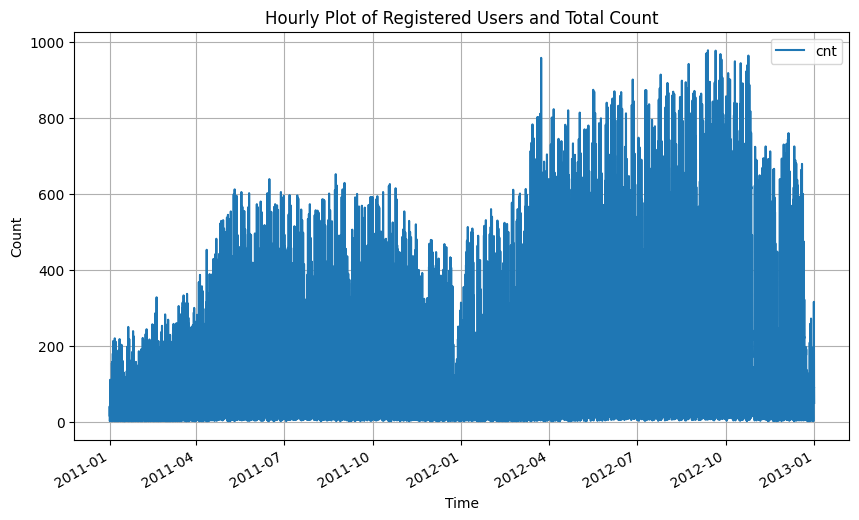

In [8]:

hourly.plot(y=[ "cnt"], figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Hourly Plot of Registered Users and Total Count')
plt.grid(True)
plt.savefig(os.path.join(result_dir, 'total_use.pdf'))
#plt.show()

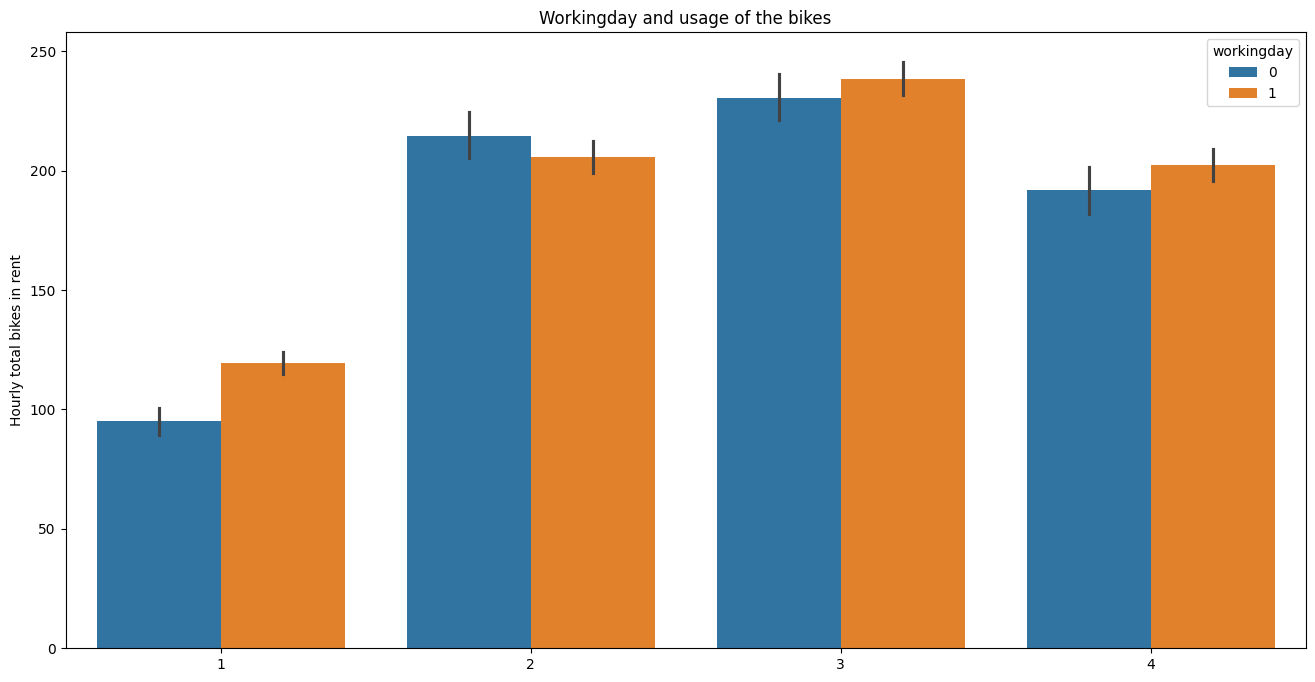

In [9]:


# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 8))
sns.barplot(x='season', y='cnt', data=hourly[['season', 'cnt', 'workingday']], hue='workingday', ax=ax1)



ax1.set_ylabel('Hourly total bikes in rent')
ax1.set_xlabel('')
ax1.set_title('Workingday and usage of the bikes')
plt.savefig(os.path.join(result_dir, 'workingdays_season.pdf'))

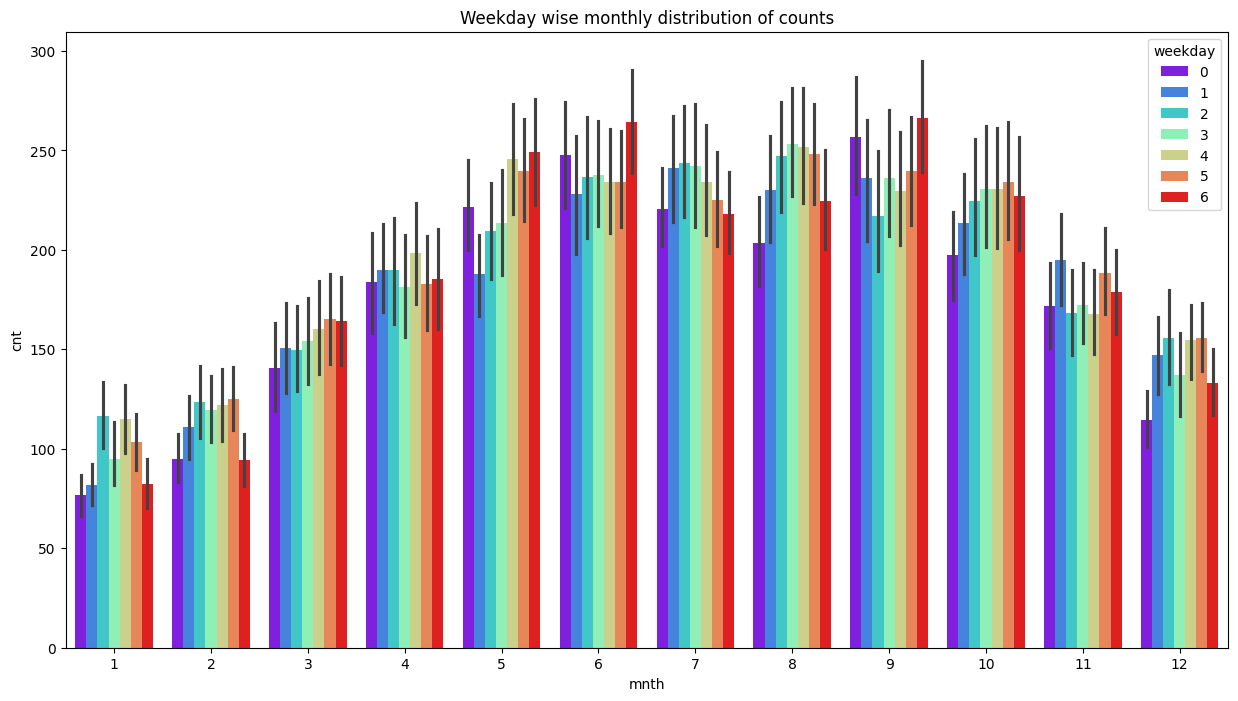

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(x='mnth', y='cnt', data=hourly[['mnth', 'cnt', 'weekday']], hue='weekday', ax=ax1, palette="rainbow")
ax1.set_title('Weekday wise monthly distribution of counts')
plt.savefig(os.path.join(result_dir, 'day_month.pdf'))

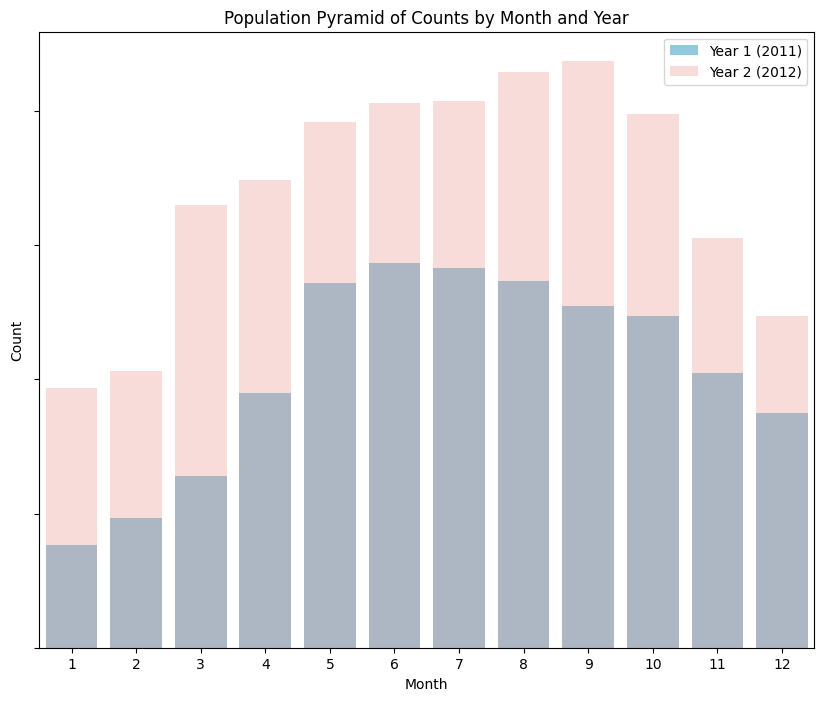

In [11]:
# Pivot the data to have counts for each month and year
pivot_df = hourly.pivot_table(index='mnth', columns='yr', values='cnt', aggfunc='sum')

# Create the population pyramid-like visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars for year 1 (2011)
sns.barplot(x=pivot_df.index, y=pivot_df[0], color='skyblue', label='Year 1 (2011)', ax=ax)

# Plot bars for year 2 (2012), adjusting the position to create pyramid effect
sns.barplot(x=pivot_df.index, y=pivot_df[1], color='salmon', alpha=0.3, label='Year 2 (2012)', ax=ax)

# Adjust labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Population Pyramid of Counts by Month and Year')
ax.legend()

# Hide y-axis labels
ax.set_yticklabels([])
plt.savefig(os.path.join(result_dir, 'bothyears_comparation.pdf'))

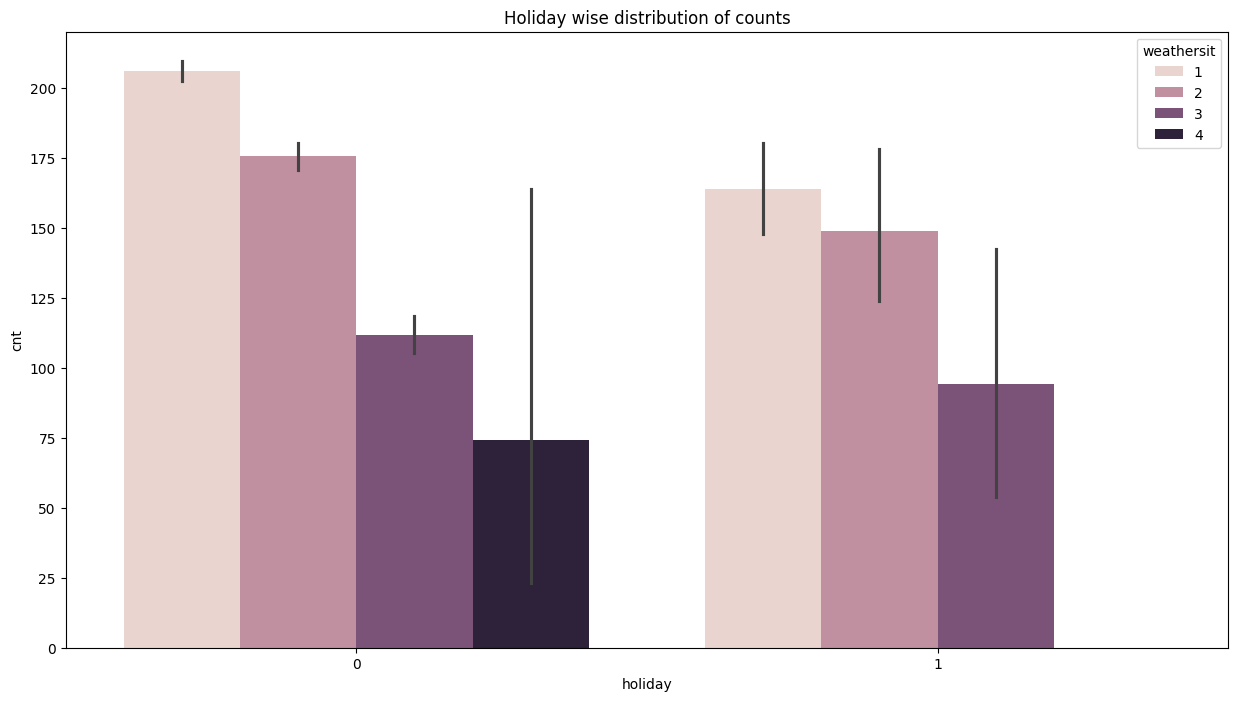

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=hourly,x='holiday',y='cnt',hue='weathersit')
ax.set_title('Holiday wise distribution of counts')
plt.savefig(os.path.join(result_dir, 'holiday_weather.pdf'))

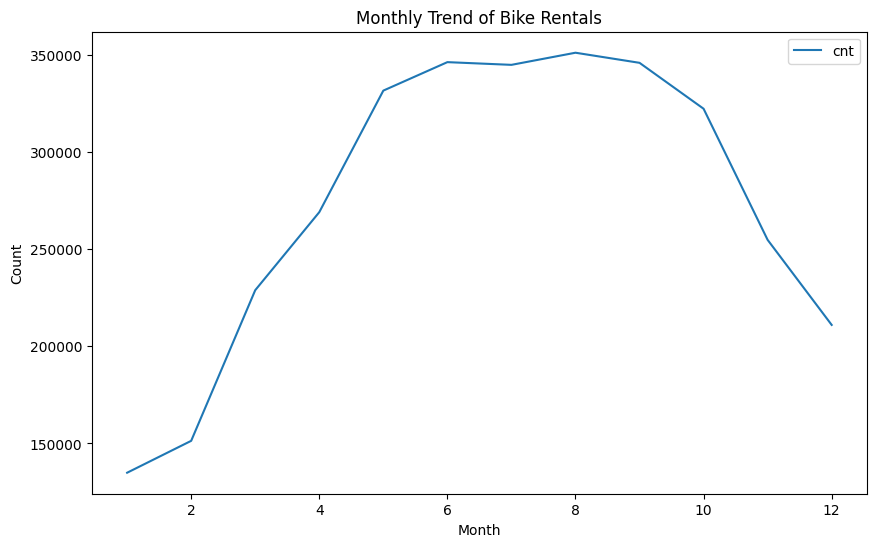

In [13]:
monthly = hourly.groupby('mnth')['cnt'].sum().reset_index()
monthly.plot(x='mnth', y='cnt', kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trend of Bike Rentals')
plt.savefig(os.path.join(result_dir, 'use_per_month.pdf'))

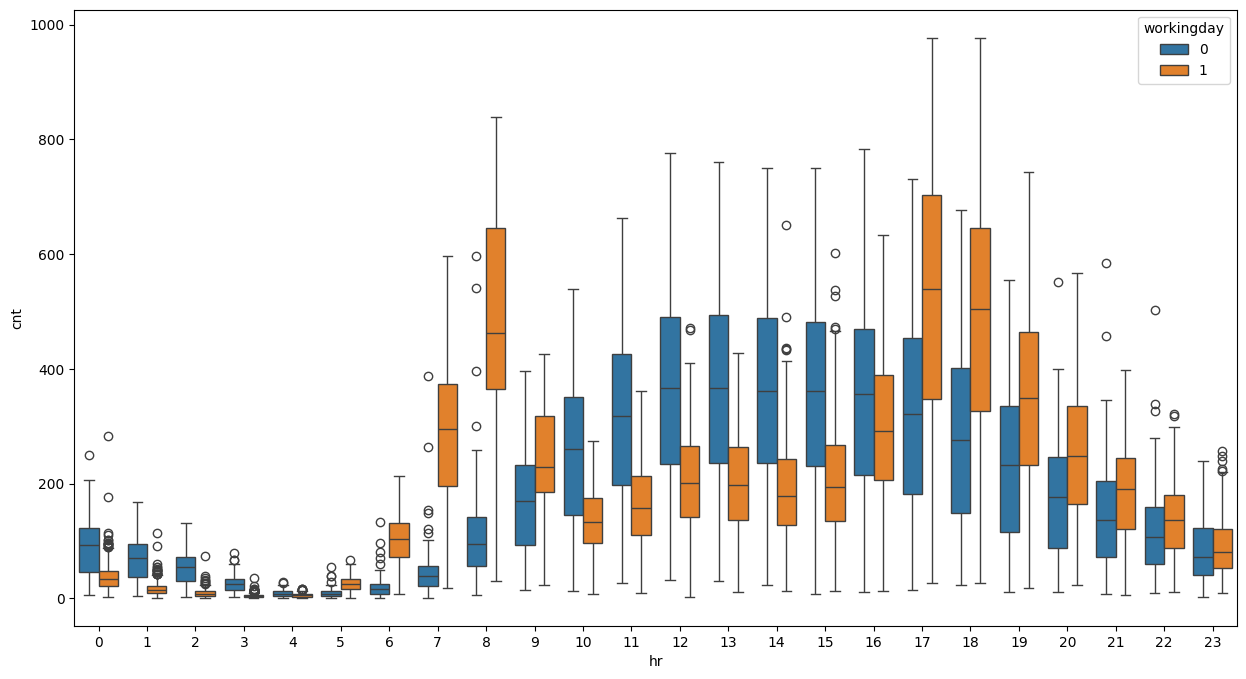

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.boxplot(data=hourly, x='hr', y='cnt', hue='workingday', ax=ax)
plt.savefig(os.path.join(result_dir, 'rental_hour.pdf'))

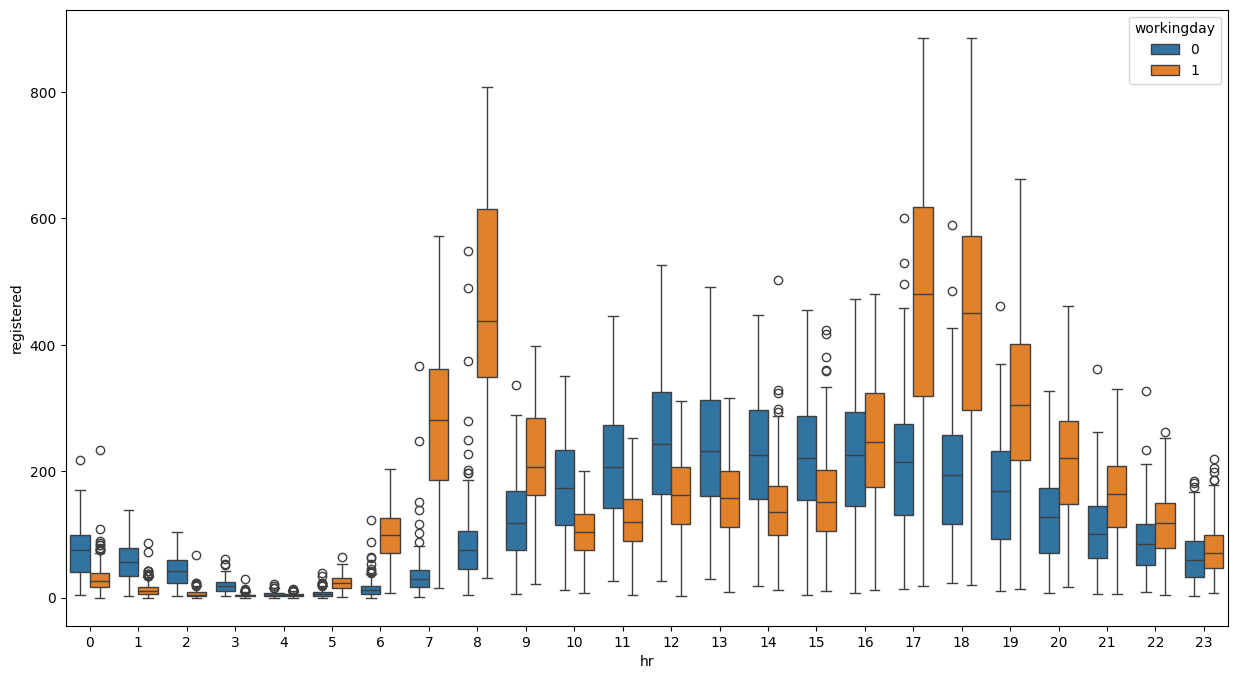

In [15]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.boxplot(data=hourly, x='hr', y='registered', hue='workingday', ax=ax)
plt.savefig(os.path.join(result_dir, 'rental_hour_register.pdf'))

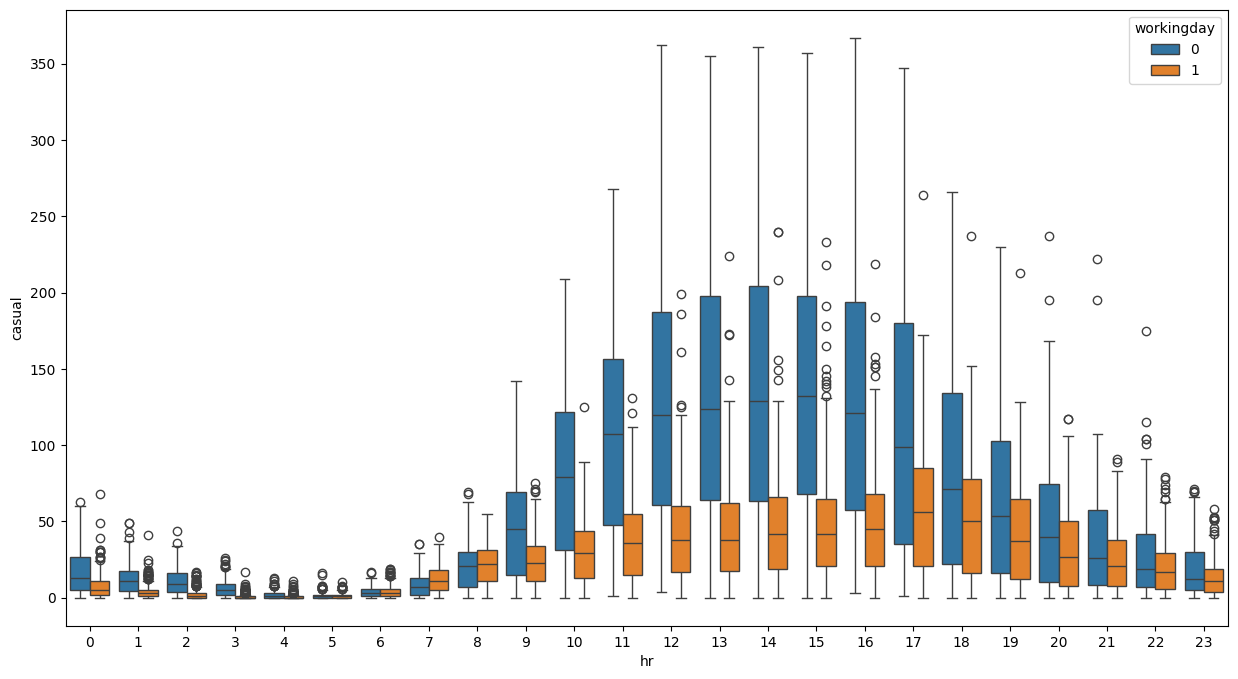

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.boxplot(data=hourly, x='hr', y='casual', hue='workingday', ax=ax)
plt.savefig(os.path.join(result_dir, 'rental_hour_casual.pdf'))